In [53]:
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image, pyplot
from skimage.transform import resize


DATA_PATH = "C:/Users/sowmi/OneDrive/Desktop/Image_Hunter_Dataset/"
spamData=[]
label=[]
hashList=[]
count=-1
for -folder in os.listdir(DATA_PATH):
    if folder=="New_Spam":
        continue;
    print(">>>Reading ",folder)
    count+=1
    for file in os.listdir(DATA_PATH+folder):
        if(str(file).endswith('.jpg') or str(file).endswith('.JPG') or str(file).endswith('.jpeg') or str(file).endswith('.JPEG')):
            img = image.imread(DATA_PATH+folder+'/'+file)
            hsh = hash(tuple(np.array(img).flatten()))
            if(hsh not in hashList):
                spamData.append(resize(img, (156, 156, 3)))
                hashList.append(hsh)
                label.append(count)
spamData=np.array(spamData)
label=np.array(label)

>>>Reading  NaturalImages
>>>Reading  SpamImages


In [54]:
print("Number of HAM",len(label[label==0]))
print("Number of SPAM",len(label[label==1]))

Number of HAM 810
Number of SPAM 897


In [55]:
print("Spam data shape : ",spamData.shape," Label shape : ",label.shape)

Spam data shape :  (1707, 156, 156, 3)  Label shape :  (1707,)


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
test_valid_Percentage = 0.3
x_train,x_test,y_train,y_test = train_test_split(spamData,label,test_size = test_valid_Percentage,random_state=42, stratify=label,shuffle=True)

In [58]:
print("x_train shape : ",x_train.shape," y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape," y_test shape : ",y_test.shape)

x_train shape :  (1194, 156, 156, 3)  y_train shape :  (1194,)
x_test shape :  (513, 156, 156, 3)  y_test shape :  (513,)


In [59]:
print("Number of train SPAM",len(y_train[y_train==0]))
print("Number of train HAM",len(y_train[y_train==1]))

print("Number of test SPAM",len(y_test[y_test==0]))
print("Number of test HAM",len(y_test[y_test==1]))

Number of train SPAM 567
Number of train HAM 627
Number of test SPAM 243
Number of test HAM 270


In [61]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [62]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

print("y_train_oh shape : ",y_train_oh.shape," y_test_oh shape : ",y_test_oh.shape)

y_train_oh shape :  (1194, 2)  y_test_oh shape :  (513, 2)


In [63]:
model=Sequential()
model.add(Conv2D(32,kernel_size=3, padding='same',activation='relu',input_shape=(156, 156,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size=3, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128,kernel_size=3, padding='same',activation='relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 156, 156, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 78, 78, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 78, 78, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 39, 39, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 39, 39, 128)       73856     
                                                                 
 dropout_8 (Dropout)         (None, 39, 39, 128)      

In [64]:
NO_OF_EPOCHS=20
BATCH_SIZE=32
history=model.fit(x_train,y_train,epochs=NO_OF_EPOCHS,verbose=1,batch_size=BATCH_SIZE,validation_split = 0.3)

Epoch 1/20
27/27 [==============================] - 27s 944ms/step - loss: 1.3471 - accuracy: 0.8144 - val_loss: 0.2545 - val_accuracy: 0.9109
Epoch 2/20
27/27 [==============================] - 26s 982ms/step - loss: 0.1849 - accuracy: 0.9437 - val_loss: 0.1768 - val_accuracy: 0.9387
Epoch 3/20
27/27 [==============================] - 25s 928ms/step - loss: 0.1423 - accuracy: 0.9605 - val_loss: 0.1561 - val_accuracy: 0.9499
Epoch 4/20
27/27 [==============================] - 25s 943ms/step - loss: 0.0853 - accuracy: 0.9784 - val_loss: 0.1009 - val_accuracy: 0.9694
Epoch 5/20
27/27 [==============================] - 25s 942ms/step - loss: 0.0536 - accuracy: 0.9844 - val_loss: 0.1072 - val_accuracy: 0.9666
Epoch 6/20
27/27 [==============================] - 25s 911ms/step - loss: 0.0238 - accuracy: 0.9940 - val_loss: 0.2367 - val_accuracy: 0.9443
Epoch 7/20
27/27 [==============================] - 26s 954ms/step - loss: 0.0635 - accuracy: 0.9868 - val_loss: 0.4304 - val_accuracy: 0.8552

In [85]:
acc=model.evaluate(x_test,y_test)[1]*100
print("Accuracy:{:.2f}%".format(acc))

17/17 [==============================] - 2s 143ms/step - loss: 0.1353 - accuracy: 0.9669
Accuracy:96.69%


In [82]:
prediction_prob1 = model.predict(x_test,verbose=1)
y_pred=np.round(prediction_prob1)

17/17 [==============================] - 3s 167ms/step


In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, f1_score, recall_score,classification_report,roc_curve, auc 

In [69]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred,average='binary'))
print(recall_score(y_test,y_pred,average='binary'))
print(f1_score(y_test,y_pred,average='binary'))
cm=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9668615984405458
0.9469964664310954
0.9925925925925926
0.969258589511754
[[228  15]
 [  2 268]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       243
           1       0.95      0.99      0.97       270

    accuracy                           0.97       513
   macro avg       0.97      0.97      0.97       513
weighted avg       0.97      0.97      0.97       513



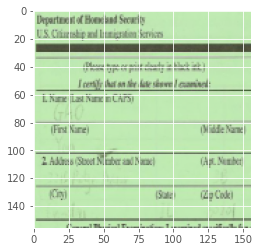

1/1 [==============================] - 0s 32ms/step
[[0.81883323]]
Spam


In [67]:
import random
idx2=random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()
y_predict=model.predict(x_test[idx2,:].reshape(1,156,156,3))
print(y_predict)
if y_predict<0.5:
    print("Not Spam")
else:
    print("Spam")

In [70]:
total = sum(sum(cm))
accuracy = (cm[0, 0] + cm[1, 1]) / total
print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 0.9669


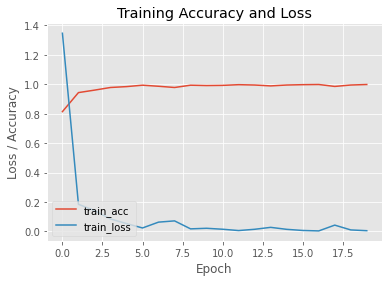

In [71]:
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["accuracy"], label= "train_acc")
plt.plot(np.arange(0, N), history.history["loss"], label= "train_loss")
plt.title("Training Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend(loc= "lower left")
plt.savefig("plot.jpg")